In [1]:
import numpy as np
from PIL import Image
from mtcnn.mtcnn import MTCNN
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_inputinput

In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.3.0'

In [4]:
D = MTCNN()

In [5]:
model = VGGFace(model='resnet50',include_top=False,input_shape=(224,224,3),pooling='avg')

In [6]:
P1 = Image.open(r'C:\Users\DeLL\Desktop\ML\CNN\Data\FaceVerification\pos_1.jpg')
P2 = Image.open(r'C:\Users\DeLL\Desktop\ML\CNN\Data\FaceVerification\pos_2.jpg')
N1 = Image.open(r'C:\Users\DeLL\Desktop\ML\CNN\Data\FaceVerification\neg_1.jpg')

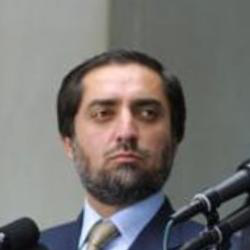

In [7]:
P1

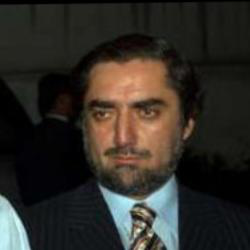

In [8]:
P2

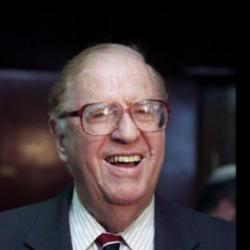

In [9]:
N1

In [10]:
P1 = np.asarray(P1)
P2 = np.asarray(P2)
N1 = np.asarray(N1)

In [11]:
def f_getFace(I):
    r = D.detect_faces(I)
    x1,y1,w,h = r[0]['box']
    x2,y2 = x1+w,y1+h
    face = I[y1:y2,x1:x2]
    return Image.fromarray(face)

In [12]:
f1 = f_getFace(P1)
f2 = f_getFace(P2)
f3 = f_getFace(N1)

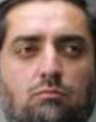

In [13]:
f1

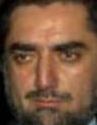

In [14]:
f2

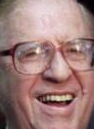

In [15]:
f3

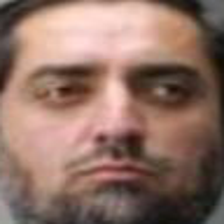

In [16]:
f1 = f1.resize((224,224))
f2 = f2.resize((224,224))
f3 = f3.resize((224,224))
f1

In [17]:
f1 = np.asarray(f1,'float32')
f2 = np.asarray(f2,'float32')
f3 = np.asarray(f3,'float32')

In [18]:
f1 = preprocess_input(f1,version=2)
f2 = preprocess_input(f2,version=2)
f3 = preprocess_input(f3,version=2)

In [19]:
f1.shape

(224, 224, 3)

In [20]:
PE1 = model.predict(f1[np.newaxis,...])
PE2 = model.predict(f2[np.newaxis,...])
NE3 = model.predict(f3[np.newaxis,...])

In [21]:
PE1.shape

(1, 2048)

In [22]:
distance_pos = np.sum((PE1-PE2)**2)**0.5
distance_neg = np.sum((PE1-NE3)**2)**0.5

In [23]:
print(distance_pos,distance_neg)

79.78436514678174 143.1978389981846
